## Observations and Insights

## Dependencies and starter code

In [19]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [20]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [21]:
# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on=('Mouse ID'))
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_group_stats = merged_df.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats.head()

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


## Bar plots

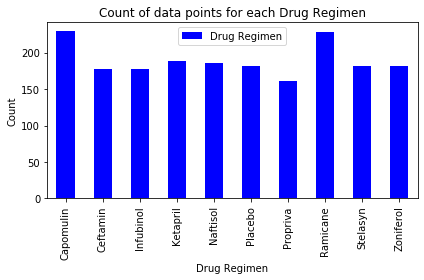

In [24]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = merged_df.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
# Save the figure
plt.savefig("../Images/PandaBarChart.png")



plt.show()

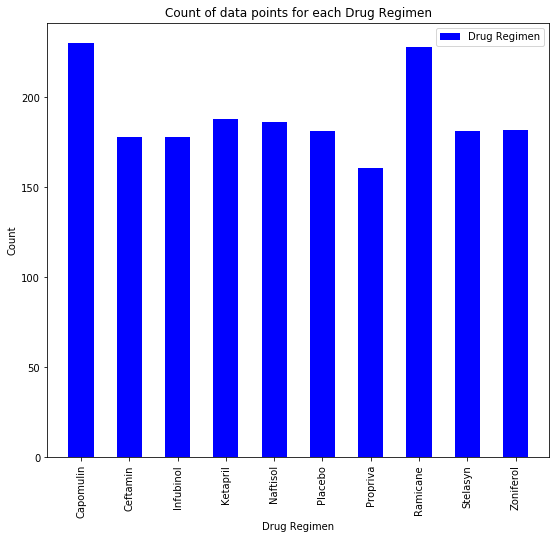

In [25]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig("../Images/PyplotBarChart.png")
plt.show()

## Pie plots

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# First create a dataframe grouping by the 'Sex' column
gender_group = merged_df.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()

,Sex
Sex,
Female,935
Male,958


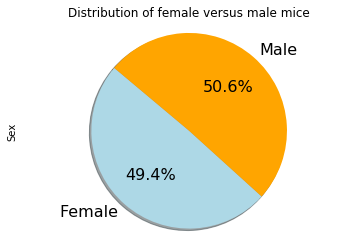

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.savefig("../Images/PandaPieChart.png")
plt.show()

## Quartiles, outliers and boxplots

In [30]:
# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = merged_df[merged_df['Drug Regimen'].isin(four_drug_list)]

# View the newly created subset dataframe
four_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [31]:

# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [32]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


In [34]:

# Create list of lists containing each column in transposed table simultaneously removing NaN values

# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

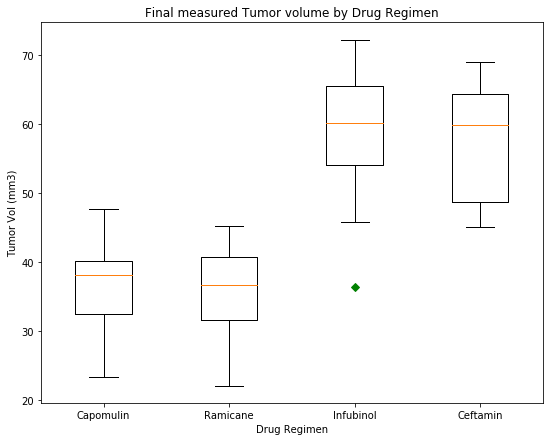

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)

# Save the figure
plt.savefig("../Images/BoxWhiskerPlot.png")

plt.show()

## Line and scatter plots

In [39]:
# Create a dataframe for only the Capomulin data
capomulin_data = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [40]:
# sem just for kicks (since no scientist would plot a line graph without error bars)

cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# View the groupby dataframe 
cap_time_tumor.head(10)

,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


In [44]:
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [48]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


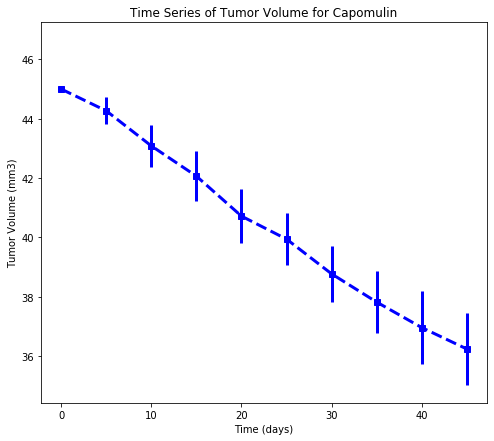

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Plot a line plot using error bars

# get the values for the x axis
time_series = list(cap_time_tumor.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    time_series,  # X values
    cap_time_tumor['Tumor_Vol_Mean'], # Y values
    yerr=cap_time_tumor['Tumor_Vol_SEM'],     # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
plt.savefig("../Images/LineChart.png")

plt.show()

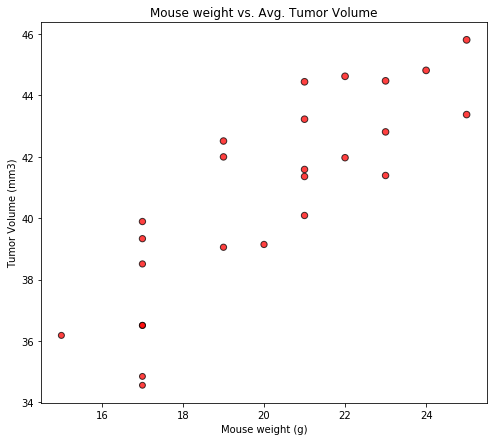

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the figure
plt.savefig("../Images/ScatterWeightTumorVol.png")

plt.show()

In [51]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen